In [1]:
% pylab
import pandas as pd

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [19]:
data = pd.read_csv('column_3C_weka.csv')

In [3]:
data.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [4]:
data.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [5]:
data.shape

(310, 7)

In [6]:
data.columns

Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')

In [7]:
data.isnull().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [8]:
%matplotlib inline

In [9]:
classes=data['class'].value_counts()

In [10]:
classes

Spondylolisthesis    150
Normal               100
Hernia                60
Name: class, dtype: int64

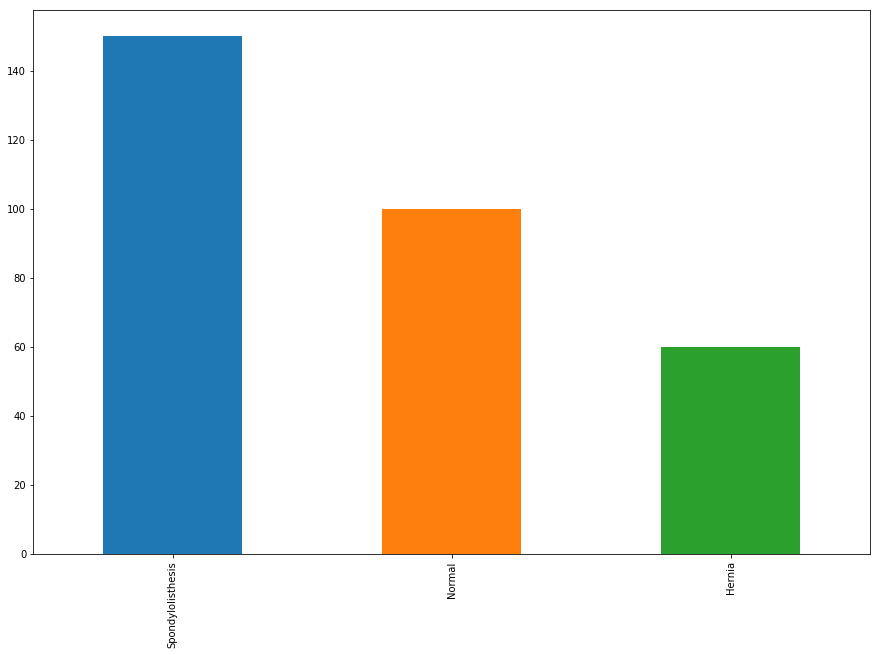

In [11]:
classes.plot(kind='bar', figsize=(15,10))

In [20]:
data['class'] = data['class'].replace({'Hernia' : 1}, regex=True)
data['class'] = data['class'].replace({'Spondylolisthesis' : 2}, regex=True)
data['class'] = data['class'].replace({'Normal' : 0}, regex=True)

In [21]:
data.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


In [ ]:
data['class'].unique()

In [22]:
data['class'].unique()

array([1, 2, 0])

In [24]:
data.dtypes

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                         int64
dtype: object

In [35]:
cols = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class']

In [26]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

In [27]:
x_scaled = min_max_scaler.fit_transform(data)

In [28]:
x_scaled

array([[0.35568788, 0.51989984, 0.22917997, ..., 0.30746116, 0.02514839,
        0.5       ],
       [0.12450104, 0.2967831 , 0.09857833, ..., 0.47664891, 0.03636497,
        0.5       ],
       [0.41166648, 0.51393229, 0.32299466, ..., 0.38609692, 0.0175229 ,
        0.5       ],
       ...,
       [0.34043781, 0.52244298, 0.28789745, ..., 0.59779618, 0.01943732,
        0.        ],
       [0.18425678, 0.27235174, 0.24684569, ..., 0.52117504, 0.02624045,
        0.        ],
       [0.07420202, 0.20770855, 0.20261992, ..., 0.57924032, 0.02527676,
        0.        ]])

In [29]:
data_normalized = pd.DataFrame(x_scaled)

In [33]:
data_normalized

,0,1,2,3,4,5,6
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148,0.5
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365,0.5
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523,0.5
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838,0.5
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173,0.5
5,0.136009,0.365744,0.099559,0.119943,0.647879,0.030933,0.5
6,0.263150,0.400439,0.207316,0.223960,0.542916,0.039680,0.5
7,0.185356,0.309190,0.134581,0.196592,0.507455,0.000890,0.5
8,0.170151,0.358811,0.256759,0.156294,0.590614,0.056674,0.5
9,0.101638,0.206581,0.250118,0.169425,0.152264,0.027287,0.5


In [38]:
data_normalized.columns = cols

In [39]:
data_normalized.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148,0.5
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365,0.5
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523,0.5
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838,0.5
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173,0.5


In [43]:
from sklearn.utils import shuffle
data_normalized = shuffle(data_normalized)

In [44]:
data_normalized.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
292,0.083028,0.164087,0.138751,0.173585,0.613595,0.024668,0.0
284,0.318458,0.377191,0.261308,0.289072,0.547950,0.032329,0.0
217,0.115528,0.234208,0.326153,0.168440,0.667096,0.040494,0.0
77,0.314744,0.254024,0.352050,0.349321,0.305614,0.145815,1.0
27,0.168133,0.411951,0.295322,0.126826,0.421440,0.046673,0.5


In [62]:
data_normalized.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
292,0.083028,0.164087,0.138751,0.173585,0.613595,0.024668,0.0
284,0.318458,0.377191,0.261308,0.289072,0.547950,0.032329,0.0
217,0.115528,0.234208,0.326153,0.168440,0.667096,0.040494,0.0
77,0.314744,0.254024,0.352050,0.349321,0.305614,0.145815,1.0
27,0.168133,0.411951,0.295322,0.126826,0.421440,0.046673,0.5


In [63]:
y = data_normalized['class']

In [73]:
x = data_normalized[['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis']]

In [80]:
y = data['class']
x = data[['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis']]

In [74]:
from sklearn.cross_validation import train_test_split

In [81]:
x_train, x_test, y_train, y_test = test=train_test_split(
        x,y,test_size=0.3,random_state=0)

In [82]:
from sklearn.svm import SVC

In [83]:
svm = SVC(kernel='linear', C=1, random_state=0)

In [84]:
svm.fit(x_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [85]:
y_pred = svm.predict(x_test)

In [86]:
print('misclassified samples: %d'%(y_test!=y_pred).sum())#compute

misclassified samples: 19


In [87]:
from sklearn.metrics import accuracy_score
print('Accuracy:%.2f'%accuracy_score(y_test,y_pred))

Accuracy:0.80


In [89]:
from sklearn.neural_network import MLPClassifier

In [118]:
MLPClassifier(hidden_layer_sizes=(100,100), max_iter=500, alpha=0.0001,
                     solver='sgd', verbose=10, activation = 'tanh', random_state=21,tol=0.000000001)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=21, shuffle=True,
       solver='sgd', tol=1e-09, validation_fraction=0.1, verbose=10,
       warm_start=False)

In [119]:
clf.fit(x_train, y_train)

/home/subz/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [120]:
y_pred = clf.predict(x_test)

In [121]:
print('misclassified samples: %d'%(y_test!=y_pred).sum())#compute

misclassified samples: 24


In [122]:
print('Accuracy:%.2f'%accuracy_score(y_test,y_pred))

Accuracy:0.74


In [123]:
from sklearn.tree import DecisionTreeClassifier

In [125]:
estimator = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=3, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [126]:
y_pred = estimator.predict(x_test)

In [127]:
print('misclassified samples: %d'%(y_test!=y_pred).sum())#compute

misclassified samples: 25


In [128]:
print('Accuracy:%.2f'%accuracy_score(y_test,y_pred))

Accuracy:0.73
